In [54]:
import yfinance as yf
import matplotlib.pyplot as plt

In [22]:
df = yf.download('TSLA', start= '2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [24]:
def MACD(df):
    df['EMA12'] = df.Close.ewm(span=12).mean()
    df['EMA26'] = df.Close.ewm(span=26).mean()
    df['MACD'] = df.EMA12 - df.EMA26
    df['signal'] = df.MACD.ewm(span=9).mean()
    print('indicators added')

In [25]:
MACD(df)

indicators added


In [9]:
df

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,signal
Date,,,,,,,,,,
2023-06-01,202.589996,209.800003,199.369995,207.520004,207.520004,148029900,207.520004,207.520004,0.000000,0.000000
2023-06-02,210.149994,217.250000,209.750000,213.970001,213.970001,164129000,211.013753,210.869041,0.144711,0.080395
2023-06-05,217.800003,221.289993,214.520004,217.610001,217.610001,151143100,213.588270,213.291002,0.297267,0.169277
2023-06-06,216.139999,221.910004,212.529999,221.309998,221.309998,146911600,216.025717,215.532763,0.492954,0.278924
2023-06-07,228.000000,230.830002,223.199997,224.570007,224.570007,185710800,218.347170,217.628537,0.718633,0.409728
...,...,...,...,...,...,...,...,...,...,...
2024-01-25,189.699997,193.000000,180.059998,182.630005,182.630005,198076800,213.338774,224.827156,-11.488382,-7.352123
2024-01-26,185.500000,186.779999,182.100006,183.250000,183.250000,107063400,208.709732,221.747357,-13.037625,-8.489224
2024-01-29,185.630005,191.479996,183.669998,190.929993,190.929993,125013100,205.974387,219.464583,-13.490196,-9.489418


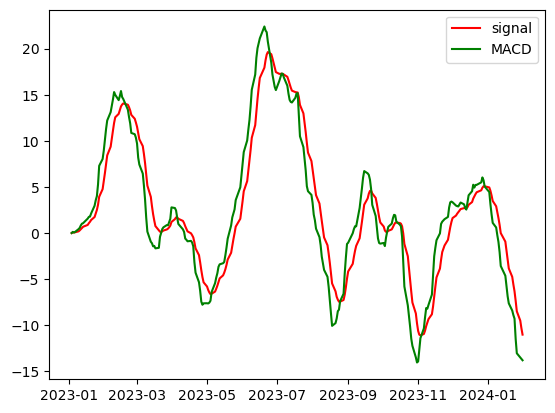

In [26]:
plt.plot(df.signal, label='signal', color='red')
plt.plot(df.MACD, label='MACD', color='green')
plt.legend()
plt.show()

In [27]:
Buy, Sell = [], []

for i in range(2, len(df)):
    if df.MACD.iloc[i] > df.signal.iloc[i] and df.MACD.iloc[i-1] < df.signal.iloc[i-1]:
        Buy.append(i)
    elif df.MACD.iloc[i] < df.signal.iloc[i] and df.MACD.iloc[i-1] > df.signal.iloc[i-1]:
        Sell.append(i)

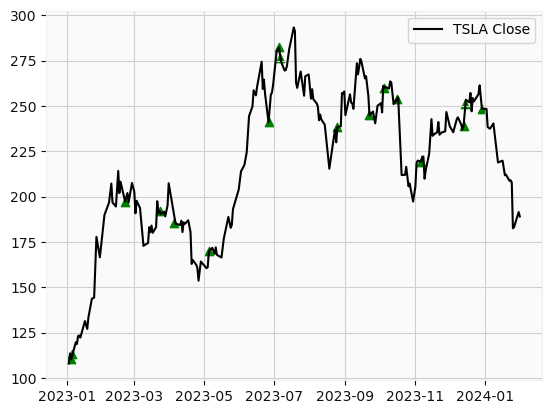

In [61]:
plt.scatter(df.iloc[Buy].index, df.iloc[Buy].Close, marker="^", color='green')
plt.scatter(df.iloc[Sell].index, df.iloc[Sell].Close, marker="^", color='green')
plt.plot(df.Close, label='TSLA Close', color='k')
plt.legend()
plt.show()

In [29]:
Buy

[3, 55, 85, 125, 162, 190, 212, 239]

In [30]:
Realbuys = [i+1 for i in Buy]
Realsells = [i+1 for i in Sell]

In [35]:
Buyprices = df.Open.iloc[Realbuys]
Sellprices = df.Open.iloc[Realsells]

In [32]:
Buyprices

Date
2023-01-09    118.959999
2023-03-24    191.649994
2023-05-08    173.720001
2023-07-06    278.089996
2023-08-28    242.580002
2023-10-06    253.979996
2023-11-07    219.979996
2023-12-15    251.210007
Name: Open, dtype: float64

In [37]:
Sellprices

Date
2023-01-06    103.000000
2023-02-22    197.929993
2023-04-06    183.080002
2023-06-27    243.240005
2023-07-07    278.429993
2023-09-25    243.380005
2023-10-17    250.100006
2023-12-14    241.220001
2024-01-02    250.080002
Name: Open, dtype: float64

In [39]:
if Sellprices.index[0] < Buyprices.index[0]:
    Sellprices = Sellprices.drop(Sellprices.index[0])
elif Buyprices.index[-1] > Sellprices.index[-1]:
    Buyprices = Buyprices.drop(Buyprices.index[-1])

In [40]:
profitsrel=[]
for i in range(len(Sellprices)):
    profitsrel.append((Sellprices[i] - Buyprices[i])/Buyprices[i])

In [41]:
profitsrel

[0.6638365349619123,
 -0.04471689192987183,
 0.40018422624887634,
 0.0012226126159443566,
 0.003297893666910664,
 -0.015276752851770877,
 0.09655425904940614,
 -0.004498247890656666]

In [44]:
sum(profitsrel)/len(profitsrel)

0.13757545423384382

In [51]:
import pandas 

In [53]:
pandas.DataFrame(profitsrel).mean()

0    0.137575
dtype: float64